# Importing Necessary Libraries

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,TimeDistributed,Conv2D,MaxPooling2D,Flatten,LSTM,GlobalAveragePooling2D,BatchNormalization
import mediapipe as mp
import collections
import warnings
warnings.filterwarnings("ignore")

# Defining the model for static signs

### Loading the static dataset

In [46]:
static_dataset= "dataset/static"
static_X, static_y = [], []
gestures = os.listdir(static_dataset)

for label in gestures:
    gesture_dir = os.path.join(static_dataset, label)
    landmark_file = os.path.join(gesture_dir, "landmarks.npy")
    if os.path.exists(landmark_file):
        landmarks = np.load(landmark_file)
        static_X.extend(landmarks)
        static_y.extend([label] * len(landmarks))  # Assign labels

static_X = np.array(static_X)  
static_y = np.array(static_y)
static_df=pd.DataFrame(static_X)
static_df["label"]=static_y

### Overview of the static dataset

In [47]:
static_df["label"].value_counts()

label
not in dataset    500
one               300
palm              300
peace             300
three             300
thumbs_down       300
thumbs_up         300
Name: count, dtype: int64

In [48]:
print(f"Static Dataset Shape: {static_df.shape[0]}, Static Labels:{static_df["label"].nunique()}")
print(gestures)

Static Dataset Shape: 2300, Static Labels:7
['not in dataset', 'one', 'palm', 'peace', 'three', 'thumbs_down', 'thumbs_up']


### Label encoding the labels

In [49]:
# Label encoding y
label_encoder = LabelEncoder()
static_y = label_encoder.fit_transform(static_y)
static_y = to_categorical(static_y)  #One hot encoding the labels

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(static_X, static_y, test_size=0.2, random_state=42)


### Defining the static model

In [50]:
# Defining the model for static data
static_model = Sequential([
    Dense(128, activation='relu', input_shape=(63,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

static_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
static_model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,903 (66.03 KB)

 Trainable params: 16,903 (66.03 KB)

 Non-trainable params: 0 (0.00 B)

**Training the model**

In [51]:
# Training model
history=static_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1406 - loss: 2.0260 - val_accuracy: 0.3239 - val_loss: 1.8435
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2240 - loss: 1.8719 - val_accuracy: 0.4217 - val_loss: 1.7330
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3522 - loss: 1.7398 - val_accuracy: 0.5348 - val_loss: 1.5433
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4419 - loss: 1.5773 - val_accuracy: 0.6630 - val_loss: 1.3027
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5344 - loss: 1.3742 - val_accuracy: 0.7196 - val_loss: 1.0585
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6191 - loss: 1.1731 - val_accuracy: 0.7848 - val_loss: 0.8667
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 1.0036 - val_accuracy: 0.7826 - val_loss: 0.7511
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6923 - loss: 0.9076 - val_accuracy: 0.8174 - val_loss:

**Loss and Accuracy plots**

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9224 - loss: 0.3022 
Test Loss: 0.2819
Test Accuracy: 93.26%


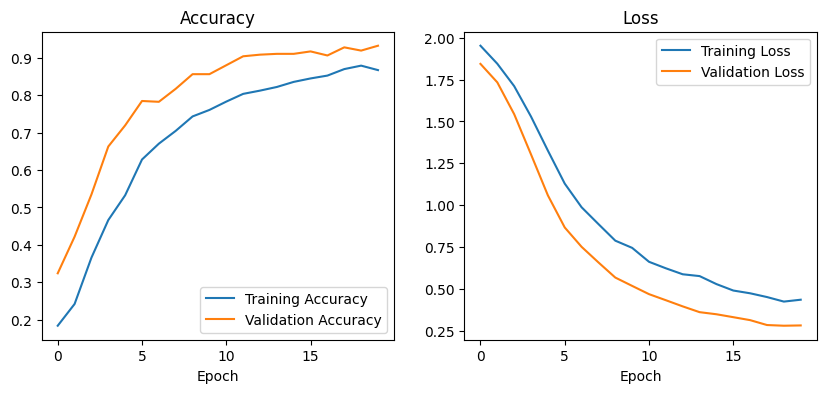

In [52]:
loss, accuracy = static_model.evaluate(X_test,y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {100*accuracy:.2f}%')

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Defining the model for dynamic signs

### Loading the dynamic dataset and encoding the labels

In [53]:
dynamic_frames_dataset = "dataset/video_frames"
X_dynamic, y_dynamic = [], []
gestures = os.listdir(dynamic_frames_dataset)

for label in gestures:
    gesture_dir = os.path.join(dynamic_frames_dataset, label)
    for frame_file in os.listdir(gesture_dir):
        frames = np.load(os.path.join(gesture_dir, frame_file))
        X_dynamic.append(frames)
        y_dynamic.append(label)

X_dynamic = np.array(X_dynamic)  
y_dynamic = np.array(y_dynamic)

# Encoding labels
label_dy = LabelEncoder()
y_dynamic = label_dy.fit_transform(y_dynamic)
y_dynamic = to_categorical(y_dynamic)  # One-hot encoding

print(f"Dataset Shape: {X_dynamic.shape}")

Dataset Shape: (80, 30, 64, 64, 3, 1)


### Defining the model

In [54]:
# Defining the dynamic model
dynamic_model = Sequential([
    TimeDistributed(Conv2D(8, (3,3), activation='relu', padding='same'), input_shape=(30, 64, 64, 3)),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(2,2)),
    TimeDistributed(Conv2D(16, (3,3), activation='relu', padding='same')),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(2,2)),
    TimeDistributed(Flatten()),
    LSTM(32),
    Dense(len(label_dy.classes_), activation='softmax')
])

dynamic_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dynamic_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_70             │ (None, 30, 64, 64, 8)  │           224 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_71             │ (None, 30, 64, 64, 8)  │            32 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_72             │ (None, 30, 32, 32, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_73             │ (None, 30, 32, 32, 16) │         1,168 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_74             │ (None, 30, 32, 32, 16) │            64 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_75             │ (None, 30, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_76             │ (None, 30, 4096)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │       528,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,132 (2.02 MB)

 Trainable params: 530,084 (2.02 MB)

 Non-trainable params: 48 (192.00 B)

**Training the model**

In [55]:
# Training the dynamic model
dynamic_history=dynamic_model.fit(X_dynamic, y_dynamic, epochs=10, validation_split=0.2)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.3021 - loss: 1.3015 - val_accuracy: 0.0000e+00 - val_loss: 2.0872
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.8438 - loss: 0.5101 - val_accuracy: 0.0000e+00 - val_loss: 1.9883
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9167 - loss: 0.3253 - val_accuracy: 0.0625 - val_loss: 1.7312
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9792 - loss: 0.2060 - val_accuracy: 0.1250 - val_loss: 1.8233
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.9896 - loss: 0.1414 - val_accuracy: 0.0000e+00 - val_loss: 2.0175
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.1257 - val_accuracy: 0.0625 - val_loss: 2.2262
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.0929 - val_accuracy: 0.0625 - val_loss: 2.4936
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.0947 - val_accuracy: 0.0625 - val_loss: 2.6330
Epo

# Final Predictions

In [57]:
#Initializing MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.7)
mp_draw = mp.solutions.drawing_utils

IMG_SIZE = (64, 64)  # Resize images for dynamic
SEQUENCE_LENGTH = 30  # Number of frames per sequence for dynamic
frames = collections.deque(maxlen=SEQUENCE_LENGTH)  # Store last 30 frames

prev_landmarks = None  

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)  #flipping the image
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(rgb_frame)

    motion_type = "Static"  # static by default
    class_names = []
    hand_count = 0
    temp = 40
    hand_y_position = 60

    if results.multi_hand_landmarks:
        hand_count = len(results.multi_hand_landmarks)

        for hand_index, hand_landmarks in enumerate(results.multi_hand_landmarks):
            mp_draw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            # Extracting landmarks
            curr_landmarks = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])

            # Checking for motion (Dynamic vs. Static)
            if prev_landmarks is not None:
                movement = np.linalg.norm(curr_landmarks - prev_landmarks, axis=1).mean()
                if movement > 0.01:  # threshold for static
                    motion_type = "Dynamic"

            prev_landmarks = curr_landmarks  # Store for next frame

            # If static, classify gesture using CNN static model
            if motion_type == "Static":
                landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]).flatten().reshape(1, -1)
                prediction = static_model.predict(landmarks, verbose=0)
                class_id = np.argmax(prediction)
                class_name = label_encoder.inverse_transform([class_id])[0]
                class_names.append(class_name)
            else: #If dynamjic classify using dynamic CNN-LSTM model
                frame_resized = cv2.resize(frame, IMG_SIZE) / 255.0
                frames.append(frame_resized)
                if len(frames) == SEQUENCE_LENGTH:
                    frames_array = np.array(frames).reshape(1, 30, 64, 64, 3)
                    prediction = dynamic_model.predict(frames_array, verbose=0)
                    class_id = np.argmax(prediction)
                    class_name = label_dy.inverse_transform([class_id])[0]
                    frames.clear()
            
            # Displaying prediction
            cv2.putText(frame, 
                        f"Hand {hand_index + 1}: {class_name}", 
                        (10, hand_y_position), 
                        cv2.FONT_HERSHEY_COMPLEX, 0.85, (50,50,50), 1)
            hand_y_position += temp  #increasing the y by temp

    # Display motion type: Static or Dynamic
    cv2.putText(frame, 
                f"Gesture Type: {motion_type}", (10, 30), 
                cv2.FONT_HERSHEY_COMPLEX, 0.8, 
                (0,0,255) if motion_type == "Dynamic" else ((255, 0, 0)), 1)

    # Displaying the frame
    cv2.imshow("Live Gesture Classification", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
